

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset contains information about 10,000 movies collected from The Movie Database(TMDb), including user ratings and revenue. The questions I am trying to answer are:

>Q1: how the movie's runtimes changing over the years?

>Q2:Which season is the best time to release a movie based on popularity?

>Q3:which movies are popularity  each season in last year and what genres are associated with that movies?

>Q4:what the measure of the spread of the buget?

>Q5:do movies with high budget got higher popularity?



In [176]:
#  import  packages to use.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties
>
Loading data:

In [177]:
# Load  data and print out a few lines

df = pd.read_csv('tmdb-movies.csv')
df.head()




,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [178]:
#check for duplicates in the dataset
sum(df.duplicated())

1

In [179]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [180]:
# recheck for duplicates in the data
sum(df.duplicated())

0

In [181]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [182]:
df.shape

(10865, 21)

function that return the number of zero in a list to delet the outliers 

In [183]:

def zero(col):
    a=col.count(0)
    return print(a)


In [184]:
df.shape

(10865, 21)



### Data Cleaning (Check and drop duplicate rows,Deleteing unwanted columns and handling null value if needed )

after droping Duplicate row, now Deleteing unwanted columns

In [185]:

df.drop(df.columns.difference(['budget_adj','genres','runtime','release_date','release_year','original_title','popularity']), 1, inplace=True)
df.head()

,popularity,original_title,runtime,genres,release_date,release_year,budget_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,1.379999e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2015,1.012000e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.839999e+08
4,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2015,1.747999e+08


In [186]:
#checking on datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   original_title  10865 non-null  object 
 2   runtime         10865 non-null  int64  
 3   genres          10842 non-null  object 
 4   release_date    10865 non-null  object 
 5   release_year    10865 non-null  int64  
 6   budget_adj      10865 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 679.1+ KB


In [187]:
#printing dataframe number of columns and rows
print(df.shape)

(10865, 7)


In [188]:
 # convert release_date column from object to a datetime
df['release_date'] = df['release_date'].apply(lambda x: dt.datetime.strptime(x, "%m/%d/%y"))

In [189]:
#rechecking on datatype of the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10865 non-null  float64       
 1   original_title  10865 non-null  object        
 2   runtime         10865 non-null  int64         
 3   genres          10842 non-null  object        
 4   release_date    10865 non-null  datetime64[ns]
 5   release_year    10865 non-null  int64         
 6   budget_adj      10865 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 679.1+ KB


In [190]:
#Checking  null value
df.isnull().sum()

popularity         0
original_title     0
runtime            0
genres            23
release_date       0
release_year       0
budget_adj         0
dtype: int64

null values in genres column will not affect my results so no need for dropping null

<a id='eda'></a>
## Exploratory Data Analysis


### Q1: how the movie's runtimes changing over the years?

In [191]:
runtime_df=df

In [192]:
runtime_df

,popularity,original_title,runtime,genres,release_date,release_year,budget_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.379999e+08
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,1.379999e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.012000e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.839999e+08
4,9.335014,Furious 7,137,Action|Crime|Thriller,2015-04-01,2015,1.747999e+08
...,...,...,...,...,...,...,...
10861,0.080598,The Endless Summer,95,Documentary,2066-06-15,1966,0.000000e+00
10862,0.065543,Grand Prix,176,Action|Adventure|Drama,2066-12-21,1966,0.000000e+00
10863,0.065141,Beregis Avtomobilya,94,Mystery|Comedy,2066-01-01,1966,0.000000e+00
10864,0.064317,"What's Up, Tiger Lily?",80,Action|Comedy,2066-11-02,1966,0.000000e+00


In [193]:
#convert runtime column into a list
runtime_list = runtime_df["runtime"].tolist()


In [194]:
#pass a runtime_list to zero function to count zeros in the column
zero(runtime_list)

31


In [195]:
# dropping the outliers  
runtime_df=runtime_df[runtime_df['runtime']!=0].dropna()
runtime_list = runtime_df["runtime"].tolist()
runtime_df

,popularity,original_title,runtime,genres,release_date,release_year,budget_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.379999e+08
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,1.379999e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.012000e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.839999e+08
4,9.335014,Furious 7,137,Action|Crime|Thriller,2015-04-01,2015,1.747999e+08
...,...,...,...,...,...,...,...
10861,0.080598,The Endless Summer,95,Documentary,2066-06-15,1966,0.000000e+00
10862,0.065543,Grand Prix,176,Action|Adventure|Drama,2066-12-21,1966,0.000000e+00
10863,0.065141,Beregis Avtomobilya,94,Mystery|Comedy,2066-01-01,1966,0.000000e+00
10864,0.064317,"What's Up, Tiger Lily?",80,Action|Comedy,2066-11-02,1966,0.000000e+00


In [196]:
#recheck
zero(runtime_list)

0


In [197]:
#using groupby to find the mean of runtime each years 
runtime_df=runtime_df.groupby('release_year')['runtime'].mean()


the reason for not using release_date column to extract the year becuase it is show error as in here  2066-11-15	

In [198]:
#display the result
runtime_df


release_year
1960    110.656250
1961    119.419355
1962    124.343750
1963    111.323529
1964    109.214286
1965    118.171429
1966    106.891304
1967    104.950000
1968    107.282051
1969    106.580645
1970    113.075000
1971    107.727273
1972    101.950000
1973    103.527273
1974    107.804348
1975    107.363636
1976    109.319149
1977    107.105263
1978    110.076923
1979    112.017544
1980    107.500000
1981    105.865854
1982    103.925926
1983    103.000000
1984    103.466667
1985    114.339450
1986     99.933884
1987    101.168000
1988    101.793103
1989    104.779412
1990    105.651515
1991    105.112782
1992    107.030075
1993    107.123596
1994    106.913043
1995    107.574713
1996    106.167488
1997    106.505208
1998    105.061905
1999    108.861607
2000    104.324444
2001    108.024896
2002    107.674242
2003    101.039286
2004    105.364821
2005    103.523546
2006    101.933661
2007    100.410959
2008    100.491903
2009     98.296226
2010     98.611111
2011     98.469274

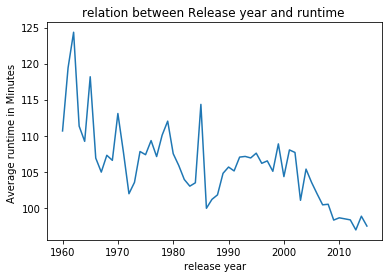

In [199]:
# Create a line chart with proper labels

lines=runtime_df.plot.line(x='release_year', y='runtime')
plt.xlabel('release year');
plt.ylabel('Average runtime in Minutes ');
plt.title('relation between Release year and runtime ');


### Q2:Which season is the best time to release a movie based on popularity?

In [200]:

df['month'] = df['release_date'].dt.month
df.head()


,popularity,original_title,runtime,genres,release_date,release_year,budget_adj,month
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.379999e+08,6
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,1.379999e+08,5
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.012000e+08,3
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.839999e+08,12
4,9.335014,Furious 7,137,Action|Crime|Thriller,2015-04-01,2015,1.747999e+08,4


assign each month to its season

In [201]:


df.loc[ (df['month'] >=2)&(df['month']<=4), 'season'] = 'spring'
df.loc[ (df['month'] >=5)&(df['month']<=7), 'season'] = 'summer'
df.loc[ (df['month'] >=8)&(df['month']<=10), 'season'] = 'fall'
df.loc[ (df['month'] >=11)&(df['month']<=12)|(df['month']==1), 'season'] = 'winter'
df

,popularity,original_title,runtime,genres,release_date,release_year,budget_adj,month,season
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.379999e+08,6,summer
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,1.379999e+08,5,summer
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.012000e+08,3,spring
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.839999e+08,12,winter
4,9.335014,Furious 7,137,Action|Crime|Thriller,2015-04-01,2015,1.747999e+08,4,spring
...,...,...,...,...,...,...,...,...,...
10861,0.080598,The Endless Summer,95,Documentary,2066-06-15,1966,0.000000e+00,6,summer
10862,0.065543,Grand Prix,176,Action|Adventure|Drama,2066-12-21,1966,0.000000e+00,12,winter
10863,0.065141,Beregis Avtomobilya,94,Mystery|Comedy,2066-01-01,1966,0.000000e+00,1,winter
10864,0.064317,"What's Up, Tiger Lily?",80,Action|Comedy,2066-11-02,1966,0.000000e+00,11,winter


In [202]:
#convert popularity column into a list
popularity_list = df["popularity"].tolist()

In [203]:
#check the 0 values
zero(popularity_list)

0


In [204]:
#using groupby to find the mean of popularity each Season 
popularity_df=df.groupby('season')['popularity'].mean()
popularity_df


season
fall      0.586479
spring    0.599274
summer    0.766475
winter    0.654061
Name: popularity, dtype: float64

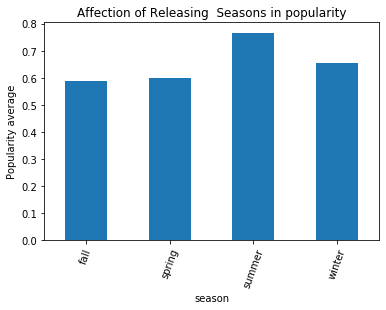

In [205]:
# Create a bar chart with proper labels

popularity_df.plot.bar(rot=70, title="Affection of Releasing  Seasons in popularity");
plt.ylabel('Popularity average');



the mean maybe misleading Because the popularity contains extreme values but not considered as outlier 

### Q3:which movies are popularity  each season in last year and what genres are associated with that movies?

In [206]:
#find the last year in dataset
last_year=df['release_year'].max()
print(last_year)

2015


In [207]:

#filter dataset for rows that has release date  2015
df=df.query('release_year == 2015')
df.head()


,popularity,original_title,runtime,genres,release_date,release_year,budget_adj,month,season
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.379999e+08,6,summer
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,1.379999e+08,5,summer
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.012000e+08,3,spring
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.839999e+08,12,winter
4,9.335014,Furious 7,137,Action|Crime|Thriller,2015-04-01,2015,1.747999e+08,4,spring


In [208]:
#confim only year is 2015
df['release_year'].unique()


array([2015])

group dataset by season and find the maximum popularity 

In [209]:

idx=df.groupby('season')['popularity'].idxmax()
#disply the rows that have the max popularity 
df.loc[idx]


,popularity,original_title,runtime,genres,release_date,release_year,budget_adj,month,season
7,7.667400,The Martian,141,Drama|Adventure|Science Fiction,2015-09-30,2015,9.935996e+07,9,fall
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.012000e+08,3,spring
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.379999e+08,6,summer
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.839999e+08,12,winter



### Q4:what the measure of the spread of the buget?


In [210]:
#convert column t a list
budget_list = df["budget_adj"].tolist()

In [211]:
#passing list to function to find the number of zeros
zero(budget_list)

419


In [212]:
# dropping the outliers  
df=df[df['budget_adj']!=0].dropna()
budget_list = df["budget_adj"].tolist()
df.head()

,popularity,original_title,runtime,genres,release_date,release_year,budget_adj,month,season
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.379999e+08,6,summer
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,1.379999e+08,5,summer
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.012000e+08,3,spring
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.839999e+08,12,winter
4,9.335014,Furious 7,137,Action|Crime|Thriller,2015-04-01,2015,1.747999e+08,4,spring


In [213]:
#statistics Summary of budget_adj column
df['budget_adj'].describe()

count    2.100000e+02
mean     3.328010e+07
std      4.537921e+07
min      9.199996e+00
25%      5.519998e+06
50%      1.379999e+07
75%      3.679998e+07
max      2.575999e+08
Name: budget_adj, dtype: float64

Display sorted dataset based on budget_adj

In [214]:
df.sort_values(by=['budget_adj'])

,popularity,original_title,runtime,genres,release_date,release_year,budget_adj,month,season
586,0.070776,Penis Boy,18,Comedy|Drama,2015-10-16,2015,9.199996e+00,10,fall
242,0.532205,The Gallows,87,Horror|Thriller,2015-07-10,2015,9.199996e+04,7,summer
304,0.402236,The D Train,101,Drama|Comedy,2015-05-08,2015,4.117219e+05,5,summer
389,0.288598,Ratter,80,Drama|Thriller|Horror,2015-01-24,2015,4.599998e+05,1,winter
409,0.259794,Grandma,78,Drama|Comedy,2015-06-04,2015,5.519998e+05,6,summer
...,...,...,...,...,...,...,...,...,...
4,9.335014,Furious 7,137,Action|Crime|Thriller,2015-04-01,2015,1.747999e+08,4,spring
20,5.462138,Tomorrowland,130,Action|Family|Science Fiction|Adventure|Mystery,2015-05-19,2015,1.747999e+08,5,summer
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.839999e+08,12,winter
10,6.200282,Spectre,148,Action|Adventure|Crime,2015-10-26,2015,2.253999e+08,10,fall


even after removing zeros the minimum budget_adj too low

the distribution of budget_adj column as a Histogram 


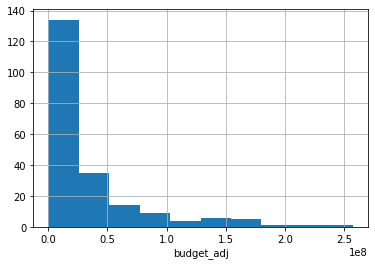

In [215]:
df.budget_adj.hist();
plt.xlabel('budget_adj');

it is right skewed distribution 

### Q5:do movies with high budget got higher popularity?

we already check and remove zeros from popularity and budget_adj column 

In [216]:
#convert column t a list
budget_list = df["budget_adj"].tolist()

 Scatterplots of budget_adj against popularity

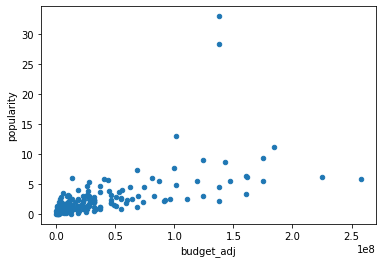

In [217]:
df.plot( x="budget_adj", y="popularity",kind="scatter");


Generally moderate  positive correlation 


###### <a id='conclusions'></a>
## Conclusions



### Research Question 1

movie's mean runtime get shorter over the years ,we can see the maximum runtime's average  in the 60's and the minimum runtime's average  in the 2010's
,there were  missing values in runtime column so deleting it may affect the result	

### Research Question 2
Most of the popular movies have Released in summer in second place comes winter Followed by spring then fall
,the datatype of release_date column was an object that why i do convert it to a datetime datatype

### Research Question 3
These movies got the highest popularity in each season in 2015

Star Wars: The Force Awakens	winter   
Insurgent                       spring
Jurassic World                  summer  
The Martian                     fall

### Research Question 4
 as we in the chart it is askewed distribution ,the max value is 2.575999e+08 and the min value is  9.199996e+00

,there were 419 missing values  deleted in budget_adj  that will affect the result

### Research Question 5
the chart show that in most cases  when budget increased the popularity increased as well 
,there was a missing and fewer data that not showing the relation clearly 